In [1]:
import warnings

warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Read in the data
df = pd.read_pickle("../data/user.pkl")

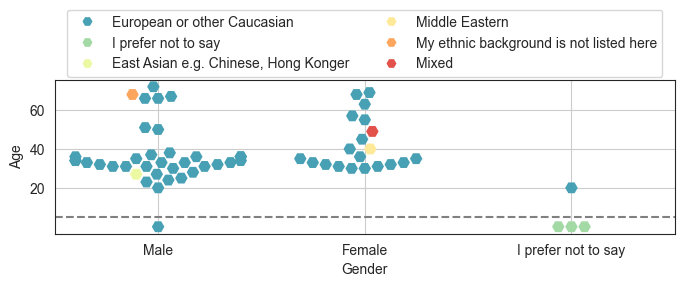

In [3]:
# Make the user stats graphic
sns.set_style("white")
plt.figure(figsize=(8, 2))
ax = sns.swarmplot(x="gender", y="age", data=df, hue="ethnicity", dodge=False, palette="Spectral_r", marker="H", size=9)

handles, labels = ax.get_legend_handles_labels()
markers = [plt.Line2D([0, 0], [0, 0], color=h.get_facecolor(), marker="H", linestyle="") for h in handles]

plt.legend(markers, labels, loc="upper center", bbox_to_anchor=(0.5, 1.5), ncol=2)
# plt.gca().invert_yaxis()
labels = [str(label) if label != 0 else "I prefer not to say" for label in plt.gca().get_yticks()]
plt.gca().set_yticklabels(labels)
plt.gca().axhline(y=5, linestyle="--", color="gray")

# make y labels as integers
plt.gca().set_yticks(np.linspace(20, 60, 3))
plt.gca().set_yticklabels(np.linspace(20, 60, 3).astype(int))
plt.gca().set_ylabel("Age")
plt.gca().set_xlabel("Gender")

# Limit the y axis
# plt.gca().set_ylim(0, 80)

plt.grid("on")
plt.savefig("../figures/user_stats.pdf", bbox_inches="tight")

In [4]:
# Age Distribution
print(f"Mean Age: {df.age.dropna().astype(int).mean():.02f}")
print(f"Std Age: {df.age.dropna().astype(int).std():.02f}")
print(f"Median Age: {df.age.dropna().astype(int).median():.02f}")
print(f"Min Age: {df[df.age != 0].age.dropna().astype(int).min():.02f}")
print(f"Max Age: {df.age.dropna().astype(int).max():.02f}")

Mean Age: 36.40
Std Age: 16.56
Median Age: 33.00
Min Age: 20.00
Max Age: 72.00


In [5]:
# Gender Distribution
print(df.gender.value_counts().to_markdown())
print("Total: ", len(df))

# Print the Gender Distribution in Percentage of Total Participants
print((df.gender.value_counts() / len(df)).to_markdown(floatfmt=".2%"))

| gender              |   count |
|:--------------------|--------:|
| Male                |      36 |
| Female              |      20 |
| I prefer not to say |       4 |
Total:  60
| gender              |   count |
|:--------------------|--------:|
| Male                |  60.00% |
| Female              |  33.33% |
| I prefer not to say |   6.67% |


In [6]:
# Ethnicity Distribution
print(df.ethnicity.value_counts().to_markdown())
print("Total: ", len(df))

| ethnicity                               |   count |
|:----------------------------------------|--------:|
| European or other Caucasian             |      53 |
| I prefer not to say                     |       3 |
| East Asian e.g. Chinese, Hong Konger    |       1 |
| Middle Eastern                          |       1 |
| My ethnic background is not listed here |       1 |
| Mixed                                   |       1 |
Total:  60
